### ESMA 3016
### Edgar Acuna
### Lab17: Aproximacion Normal a la Binomial (Teorema de Moivre, 1733)

### Octubre 2020

In [1]:
from scipy.stats  import binom,norm
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,factorial,pi
%matplotlib inline

Si X es binomial(n.p) entonces $Z=\frac {X-np}{\sqrt{npq}}$ is N(0,1) cuando n es grande
Como X es discreta y Z es continua se aplica un factor de correccion por continuidad de .5 y despues se entandariza.
Asi $P[X=k]\sim P[k-.5<X<k+.5]\sim P[\frac{k-.5-np}{\sqrt{npq}}<Z<\frac{k+.5-np}{\sqrt{npq}}]$

Este es un caso particular del Teorema del Limite Central, que se vera mas adelante.

### Ejemplo 1. Binomial con n=20 y p=.3 y k=1,  np=6 y npq=4.2

In [2]:
p_exacta=binom.pmf(1,20,.3)
p_exacta

0.006839337111223886

In [3]:
#Estandararizando
p_aprox1=norm.cdf((1.5-6)/sqrt(4.2))-norm.cdf((.5-6)/sqrt(4.2))
p_aprox1

0.010413673952426927

In [4]:
#Sin estandarizar
p_aprox2=norm.cdf(1.5,6,sqrt(4.2))-norm.cdf(0.5,6,sqrt(4.2))
p_aprox2

0.010413673952426927

### Ejemplo 2. con n=100 y p=.4 y k=45, np=40 y npq=24

In [5]:
p_exacta=binom.pmf(45,100,.4)
p_aprox=norm.cdf(5.5/sqrt(24))-norm.cdf(4.5/sqrt(24))
print(p_exacta, p_aprox)

0.04781118010335342 0.04837711536746547


### Ejemplo 3. con n=100 y p=.4 y k=10, np=40 y npq=24

In [6]:
p_exacta=binom.pmf(10,100,.4)
p_aprox=norm.cdf(-29.5/sqrt(24))-norm.cdf(-30.5/sqrt(24))
print(p_exacta, p_aprox)

1.9611792049918015e-11 6.236008500329998e-10


### Otras formulas:
$$P[a\leq X\leq b]\sim P[\frac{ a-.5-np}{\sqrt{npq}}<Z<\frac{ b+.5-np}{\sqrt{npq}}]=F[\frac {b+.5-np}{\sqrt{npq}}]-F[\frac {a-.5-np}{\sqrt{npq}}]$$

### Ejemplo 4. con n=100 y p=.4, calcular P(25<=X<=35)

In [7]:
p_exacta=binom.cdf(35,100,.4)-binom.cdf(24,100,.4)
p_aprox=norm.cdf(-4.5/sqrt(24))-norm.cdf(-15.5/sqrt(24))
print(p_exacta, p_aprox)

0.17890781740877962 0.17838494686199832


#### Trazando las probabilidades binomiales y la curva normal que aproxima las probabilidades (Teorema de Moivre)

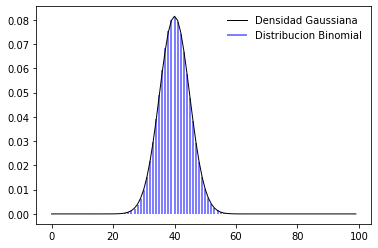

In [8]:
x=np.arange(0,100,1)
fig, ax = plt.subplots(1, 1)
ax.vlines(x, 0, binom.pmf(x,100,.4), colors='b', lw=2, alpha=0.5, label='Distribucion Binomial')
ax.plot(x, norm.pdf(x,40,sqrt(24)), 'k-', lw=1, label='Densidad Gaussiana')
ax.legend(loc='best', frameon=False)

### Teorema de Moivre pero usando proporciones

$\hat{p}=\frac{X}{n}$, proporcion de eventos en una muestra 
de tamano n, $\hat{p}$ es un numero entre 0 y 1.

$Z=\frac{\hat{p}-p}{\sqrt{\frac{pq}{n}}}$ es aproximadamnte N(0,1), la probabilidad p es conocida

Formula: $Prob(\hat{p}<po)=P(Z<\frac{po-p}{\sqrt{\frac{pq}{n}}})$

### Ejemplo 5. Cual es la probabilidad estimada de que en una muestra de tamano 100, la proporcion de  eventos sea menor de .6 si se sabe que en la probabilidad de ocurrencia p es .4

In [9]:
p_aprox=norm.cdf(.6,.4,sqrt(.0024))
#La probabiidad exacta es
p_exacta=binom.cdf(59,100,.4)
print(p_exacta, p_aprox)

0.9999575336129427 0.999977721454698
